Accuracy: 0.9612
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18254
           1       0.86      0.66      0.75      1743

    accuracy                           0.96     19997
   macro avg       0.92      0.82      0.86     19997
weighted avg       0.96      0.96      0.96     19997

AUC-ROC Score: 0.9627788022914492
Confusion Matrix:
 [[18075   179]
 [  597  1146]]


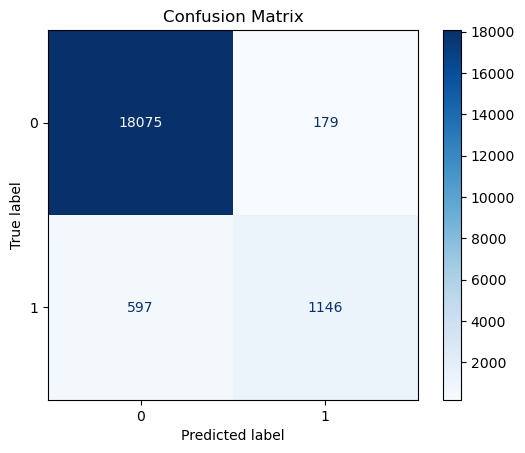

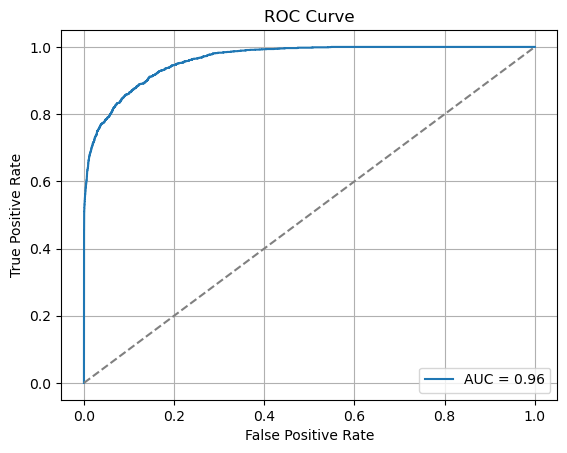

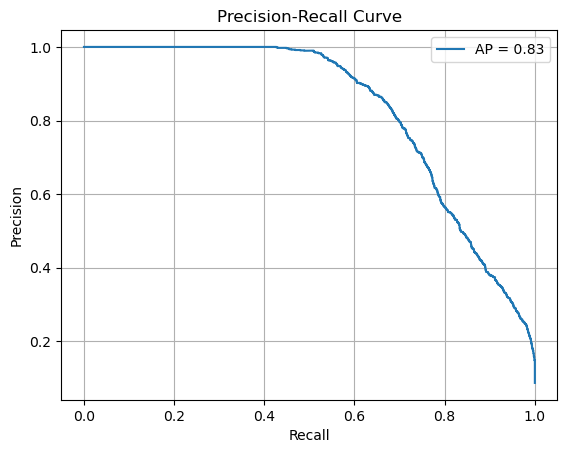


Performance Metrics Summary:
                        Value
Accuracy             0.961194
AUC-ROC              0.962779
Log Loss             0.112512
Brier Score          0.031367
Cohen's Kappa        0.726473
Matthews Corr. Coef  0.734489
RMSE                 0.177108
MSE                  0.031367
                 Feature  Coefficient  Odds Ratio
11           hbA1c_level     2.331841   10.296876
9          heart_disease     0.796952    2.218769
8           hypertension     0.780874    2.183381
1                 gender    -0.278240    0.757115
10                   bmi     0.090236    1.094432
7             race:Other    -0.079081    0.923965
3   race:AfricanAmerican     0.073658    1.076439
2                    age     0.046171    1.047253
12   blood_glucose_level     0.033338    1.033900
6          race:Hispanic     0.021357    1.021587
5         race:Caucasian    -0.015409    0.984709
0                   year    -0.013402    0.986687
4             race:Asian    -0.000840    0.999161


In [ ]:

#importing libraries
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#load
df = pd.read_csv("diabetes_dataset_with_notes.csv") 
#map gender
df["gender"] = df["gender"].map({"Female": 1, "Male": 0})
#drop null values
df = df.dropna()
#convert gender to int
df["gender"] = df["gender"].astype(int)

#defining parameters for x and y
X = df[["year",'gender',"age",'race:AfricanAmerican','race:Asian','race:Caucasian','race:Hispanic','race:Other',"hypertension","heart_disease","bmi","hbA1c_level","blood_glucose_level"]]
y = df["diabetes"]
#test and train division
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)
#model
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)
#predict
y_pred = model.predict(X_test)
#show
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

# get predicted probabilities for positive class (1)
y_prob = model.predict_proba(X_test)[:, 1]

# AUC-ROC 
auc = roc_auc_score(y_test, y_prob)
print("AUC-ROC Score:", auc)

# Confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

#matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

#ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)

plt.plot(recall, precision, label=f'AP = {avg_precision:.2f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()


from sklearn.metrics import f1_score, log_loss, brier_score_loss, cohen_kappa_score, matthews_corrcoef
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error

metrics_summary = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "AUC-ROC": roc_auc_score(y_test, y_prob),
    "Log Loss": log_loss(y_test, y_prob),
    "Brier Score": brier_score_loss(y_test, y_prob),
    "Cohen's Kappa": cohen_kappa_score(y_test, y_pred),
    "Matthews Corr. Coef": matthews_corrcoef(y_test, y_pred),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_prob)),
    "MSE": mean_squared_error(y_test, y_prob)
}

summary_df = pd.DataFrame(metrics_summary, index=["Value"]).T
print("\nPerformance Metrics Summary:")
print(summary_df)

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0],
    'Odds Ratio': np.exp(model.coef_[0])
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df)


Accuracy: 0.8816
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     18254
           1       0.42      0.89      0.57      1743

    accuracy                           0.88     19997
   macro avg       0.70      0.88      0.75     19997
weighted avg       0.94      0.88      0.90     19997

AUC-ROC Score: 0.9633599432399103
Confusion Matrix:
 [[16083  2171]
 [  197  1546]]


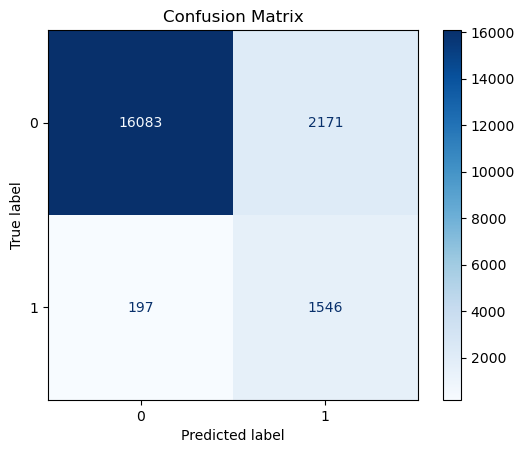

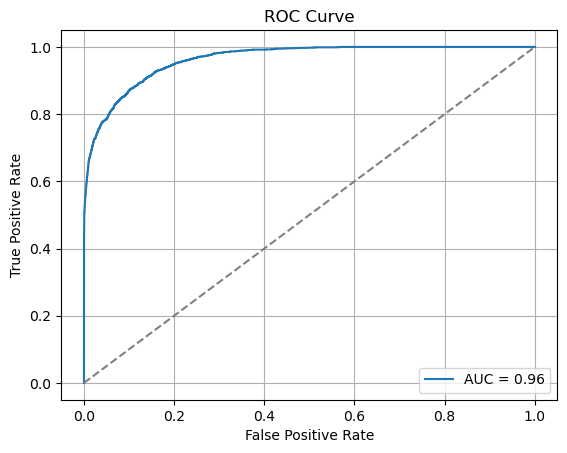

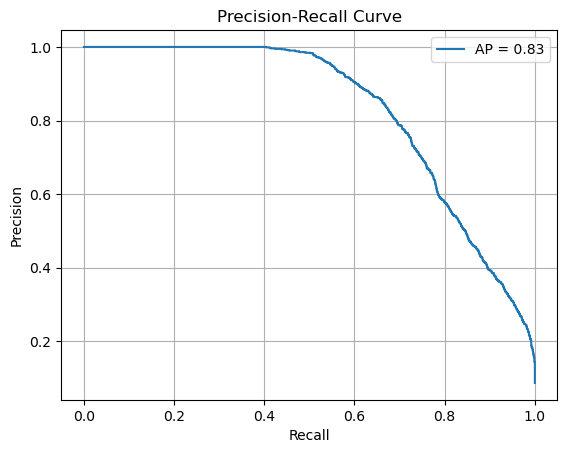


Performance Metrics Summary:
                        Value
Accuracy             0.881582
AUC-ROC              0.963360
Log Loss             0.257103
Brier Score          0.082035
Cohen's Kappa        0.507900
Matthews Corr. Coef  0.556917
RMSE                 0.286418
MSE                  0.082035
                 Feature  Coefficient  Odds Ratio
11           hbA1c_level     2.167450    8.735980
9          heart_disease     0.850793    2.341503
8           hypertension     0.839543    2.315309
1                 gender    -0.287606    0.750057
7             race:Other    -0.121467    0.885620
3   race:AfricanAmerican     0.112195    1.118731
10                   bmi     0.096102    1.100872
2                    age     0.049974    1.051243
12   blood_glucose_level     0.031599    1.032104
6          race:Hispanic     0.015798    1.015923
5         race:Caucasian    -0.013654    0.986438
0                   year    -0.011761    0.988308
4             race:Asian     0.006637    1.006659


In [ ]:
#with class weight balanced
#importing libraries
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#load
df = pd.read_csv("diabetes_dataset_with_notes.csv") 
#map gender
df["gender"] = df["gender"].map({"Female": 1, "Male": 0})
#drop null values
df = df.dropna()
#convert gender to int
df["gender"] = df["gender"].astype(int)

#defining parameters for x and y
X = df[["year",'gender',"age",'race:AfricanAmerican','race:Asian','race:Caucasian','race:Hispanic','race:Other',"hypertension","heart_disease","bmi","hbA1c_level","blood_glucose_level"]]
y = df["diabetes"]
#test and train division
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)
#model
model = LogisticRegression(max_iter=2000,class_weight='balanced')
model.fit(X_train, y_train)
#predict
y_pred = model.predict(X_test)
#show
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

# get predicted probabilities for the positive class (1)
y_prob = model.predict_proba(X_test)[:, 1]

# AUC-ROC 
auc = roc_auc_score(y_test, y_prob)
print("AUC-ROC Score:", auc)

# Confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# curve plotting
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)

plt.plot(recall, precision, label=f'AP = {avg_precision:.2f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()


from sklearn.metrics import f1_score, log_loss, brier_score_loss, cohen_kappa_score, matthews_corrcoef
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error

metrics_summary = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "AUC-ROC": roc_auc_score(y_test, y_prob),
    "Log Loss": log_loss(y_test, y_prob),
    "Brier Score": brier_score_loss(y_test, y_prob),
    "Cohen's Kappa": cohen_kappa_score(y_test, y_pred),
    "Matthews Corr. Coef": matthews_corrcoef(y_test, y_pred),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_prob)),
    "MSE": mean_squared_error(y_test, y_prob)
}

summary_df = pd.DataFrame(metrics_summary, index=["Value"]).T
print("\nPerformance Metrics Summary:")
print(summary_df)

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0],
    'Odds Ratio': np.exp(model.coef_[0])
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df)

Accuracy: 0.8816
Classification Report (Default Threshold):
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     18254
           1       0.42      0.89      0.57      1743

    accuracy                           0.88     19997
   macro avg       0.70      0.88      0.75     19997
weighted avg       0.94      0.88      0.90     19997

AUC-ROC Score: 0.9633599432399103
Confusion Matrix:
 [[16083  2171]
 [  197  1546]]


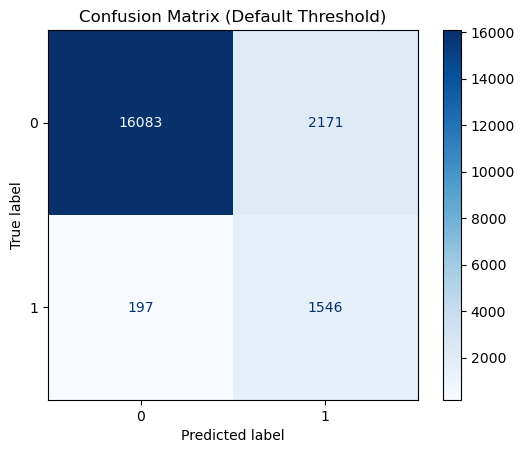

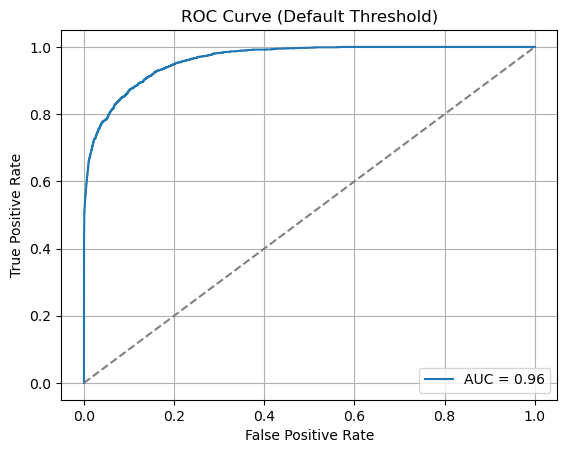

Best Threshold (Max F1): 0.9130
Classification Report (Best Threshold):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18254
           1       0.85      0.66      0.75      1743

    accuracy                           0.96     19997
   macro avg       0.91      0.83      0.86     19997
weighted avg       0.96      0.96      0.96     19997



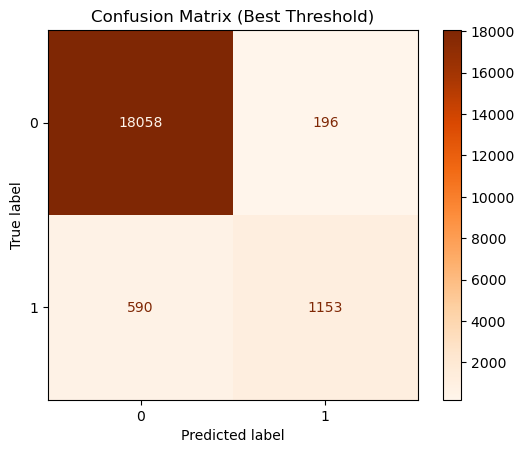

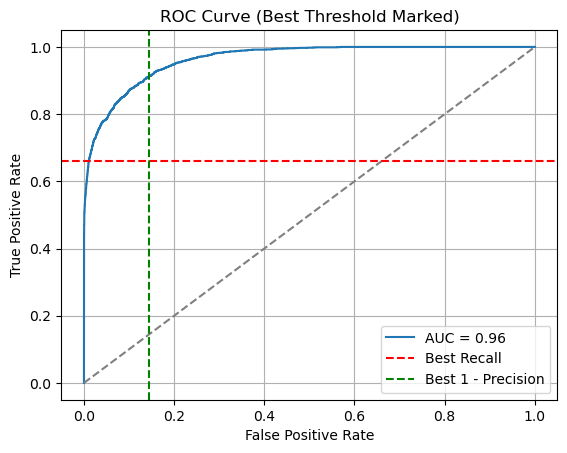

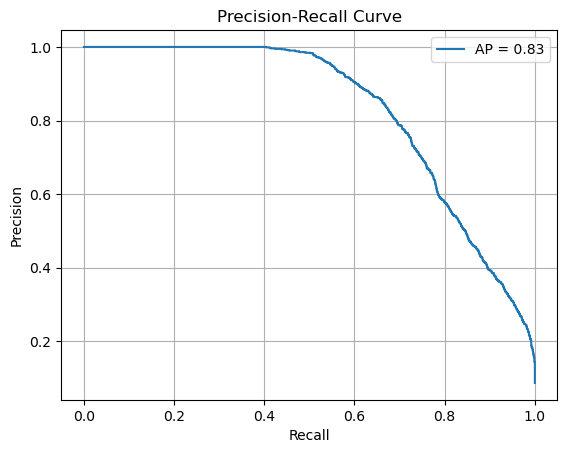


Performance Metrics Summary:
                        Value
Accuracy             0.960694
AUC-ROC              0.963360
Log Loss             0.257103
Brier Score          0.082035
Cohen's Kappa        0.724870
Matthews Corr. Coef  0.731864
RMSE                 0.286418
MSE                  0.082035
                 Feature  Coefficient  Odds Ratio
11           hbA1c_level     2.167450    8.735980
9          heart_disease     0.850793    2.341503
8           hypertension     0.839543    2.315309
1                 gender    -0.287606    0.750057
7             race:Other    -0.121467    0.885620
3   race:AfricanAmerican     0.112195    1.118731
10                   bmi     0.096102    1.100872
2                    age     0.049974    1.051243
12   blood_glucose_level     0.031599    1.032104
6          race:Hispanic     0.015798    1.015923
5         race:Caucasian    -0.013654    0.986438
0                   year    -0.011761    0.988308
4             race:Asian     0.006637    1.006659


In [ ]:
#with class weight balanced and best threshold calculation
# importing libraries
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay
import seaborn as sns
import pandas as pd
import numpy as np

# load dataset
df = pd.read_csv("diabetes_dataset_with_notes.csv") 
df["gender"] = df["gender"].map({"Female": 1, "Male": 0})
df = df.dropna()
df["gender"] = df["gender"].astype(int)

# define features and target
X = df[["year",'gender',"age",'race:AfricanAmerican','race:Asian','race:Caucasian','race:Hispanic','race:Other',
        "hypertension","heart_disease","bmi","hbA1c_level","blood_glucose_level"]]
y = df["diabetes"]

# splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# training
model = LogisticRegression(max_iter=2000,class_weight='balanced')
model.fit(X_train, y_train)

# prediction
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print("Classification Report (Default Threshold):")
print(classification_report(y_test, y_pred))

y_prob = model.predict_proba(X_test)[:, 1]

# AUC-ROC 
auc = roc_auc_score(y_test, y_prob)
print("AUC-ROC Score:", auc)

# confusion matrix (default threshold)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Default Threshold)")
plt.show()

# ROC Curve (default threshold)
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Default Threshold)")
plt.legend()
plt.grid()
plt.show()

# ------------------------
# Best Threshold (Max F1)
# ------------------------

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
f1_scores = np.nan_to_num((2 * precision * recall) / (precision + recall))
best_threshold = thresholds[f1_scores[:-1].argmax()]
print(f"Best Threshold (Max F1): {best_threshold:.4f}")

# best threshold prediction
y_pred_best = (y_prob >= best_threshold).astype(int)
print("Classification Report (Best Threshold):")
print(classification_report(y_test, y_pred_best))

# confusion Matrix (best threshold)
cm_best = confusion_matrix(y_test, y_pred_best)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=model.classes_)
disp_best.plot(cmap='Oranges')
plt.title("Confusion Matrix (Best Threshold)")
plt.show()

# ROC Curve (same curve, marked)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.axhline(y=recall[f1_scores.argmax()], color='r', linestyle='--', label='Best Recall')
plt.axvline(x=1 - precision[f1_scores.argmax()], color='g', linestyle='--', label='Best 1 - Precision')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Best Threshold Marked)")
plt.legend()
plt.grid()
plt.show()

from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)

plt.plot(recall, precision, label=f'AP = {avg_precision:.2f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()


from sklearn.metrics import f1_score, log_loss, brier_score_loss, cohen_kappa_score, matthews_corrcoef
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error

metrics_summary = {
    "Accuracy": accuracy_score(y_test, y_pred_best),
    "AUC-ROC": roc_auc_score(y_test, y_prob),
    "Log Loss": log_loss(y_test, y_prob),
    "Brier Score": brier_score_loss(y_test, y_prob),
    "Cohen's Kappa": cohen_kappa_score(y_test, y_pred_best),
    "Matthews Corr. Coef": matthews_corrcoef(y_test, y_pred_best),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_prob)),
    "MSE": mean_squared_error(y_test, y_prob)
}

summary_df = pd.DataFrame(metrics_summary, index=["Value"]).T
print("\nPerformance Metrics Summary:")
print(summary_df)

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0],
    'Odds Ratio': np.exp(model.coef_[0])
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df)

Accuracy: 0.8885
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     18322
           1       0.42      0.87      0.57      1675

    accuracy                           0.89     19997
   macro avg       0.70      0.88      0.75     19997
weighted avg       0.94      0.89      0.91     19997

AUC-ROC Score: 0.9601621898150337
Confusion Matrix:
 [[16305  2017]
 [  213  1462]]


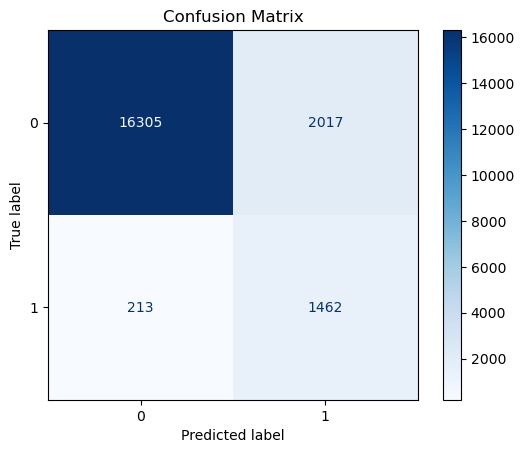

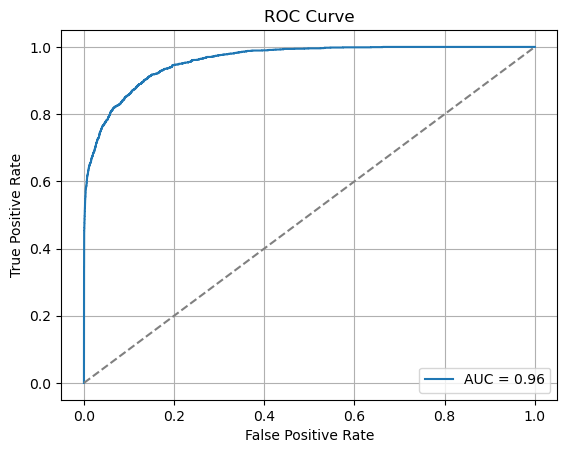

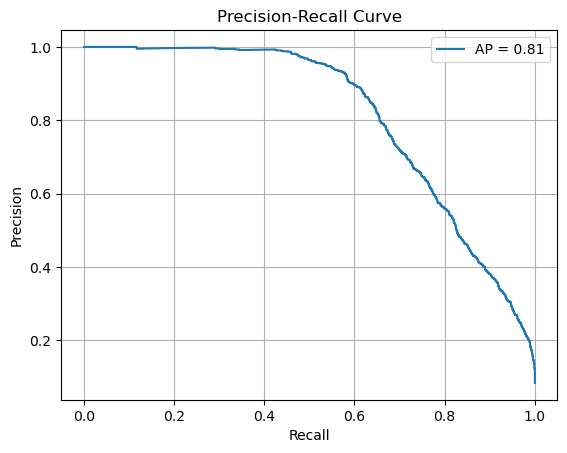


Performance Metrics Summary:
                        Value
Accuracy             0.888483
AUC-ROC              0.960162
Log Loss             0.245568
Brier Score          0.077079
Cohen's Kappa        0.512161
Matthews Corr. Coef  0.557404
RMSE                 0.277630
MSE                  0.077079
                 Feature  Coefficient  Odds Ratio
11           hbA1c_level     1.751801    5.764976
8           hypertension     0.530236    1.699333
9          heart_disease     0.419672    1.521463
1                 gender    -0.263208    0.768582
10                   bmi     0.092084    1.096457
7             race:Other    -0.078199    0.924781
6          race:Hispanic     0.073039    1.075772
3   race:AfricanAmerican     0.071201    1.073797
5         race:Caucasian    -0.052489    0.948865
2                    age     0.049397    1.050638
12   blood_glucose_level     0.029245    1.029677
4             race:Asian    -0.013670    0.986423
0                   year    -0.010234    0.989818


In [ ]:
#(max_iter=2000, C=0.01, class_weight='balanced') and using undersampling on train data
#importing libraries
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler #
from sklearn.preprocessing import MinMaxScaler #
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#load
df = pd.read_csv("diabetes_dataset_with_notes.csv") 
#map gender
df["gender"] = df["gender"].map({"Female": 1, "Male": 0})
#drop null values
df = df.dropna()
#convert gender to int
df["gender"] = df["gender"].astype(int)

# Define features and target
X = df[["year", "gender", "age", 'race:AfricanAmerican', 'race:Asian',
        'race:Caucasian', 'race:Hispanic', 'race:Other',
        "hypertension", "heart_disease", "bmi", "hbA1c_level", "blood_glucose_level"]]
y = df["diabetes"]

# split before balancing (to keep test set representative)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1500
)

# balance the training data
train_df = X_train.copy()
train_df["diabetes"] = y_train

df_zero = train_df[train_df["diabetes"] == 0].sample(9000, random_state=42)
df_one = train_df[train_df["diabetes"] == 1]
df_train_bal = pd.concat([df_zero, df_one], ignore_index=True).sample(frac=1, random_state=42)

X_train_bal = df_train_bal.drop("diabetes", axis=1)
y_train_bal = df_train_bal["diabetes"]

# train model
model = LogisticRegression(max_iter=2000, C=0.01, class_weight='balanced')
model.fit(X_train_bal, y_train_bal)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

# get predicted probabilities for ROC
y_prob = model.predict_proba(X_test)[:, 1]

# AUC-ROC Score
auc = roc_auc_score(y_test, y_prob)
print("AUC-ROC Score:", auc)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# confusion matrix plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# curve plot
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)

plt.plot(recall, precision, label=f'AP = {avg_precision:.2f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()


from sklearn.metrics import f1_score, log_loss, brier_score_loss, cohen_kappa_score, matthews_corrcoef
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error

metrics_summary = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "AUC-ROC": roc_auc_score(y_test, y_prob),
    "Log Loss": log_loss(y_test, y_prob),
    "Brier Score": brier_score_loss(y_test, y_prob),
    "Cohen's Kappa": cohen_kappa_score(y_test, y_pred),
    "Matthews Corr. Coef": matthews_corrcoef(y_test, y_pred),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_prob)),
    "MSE": mean_squared_error(y_test, y_prob)
}

summary_df = pd.DataFrame(metrics_summary, index=["Value"]).T
print("\nPerformance Metrics Summary:")
print(summary_df)

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0],
    'Odds Ratio': np.exp(model.coef_[0])
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df)

Accuracy: 0.8851
              precision    recall  f1-score   support

           0       0.99      0.89      0.93     18274
           1       0.42      0.88      0.57      1723

    accuracy                           0.89     19997
   macro avg       0.70      0.88      0.75     19997
weighted avg       0.94      0.89      0.90     19997

AUC-ROC Score: 0.9615113836574626
Confusion Matrix:
 [[16180  2094]
 [  204  1519]]
Best Threshold (Max F1): 0.8755
Classification Report with Best Threshold:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18274
           1       0.83      0.64      0.73      1723

    accuracy                           0.96     19997
   macro avg       0.90      0.82      0.85     19997
weighted avg       0.96      0.96      0.96     19997

Accuracy: 0.9581


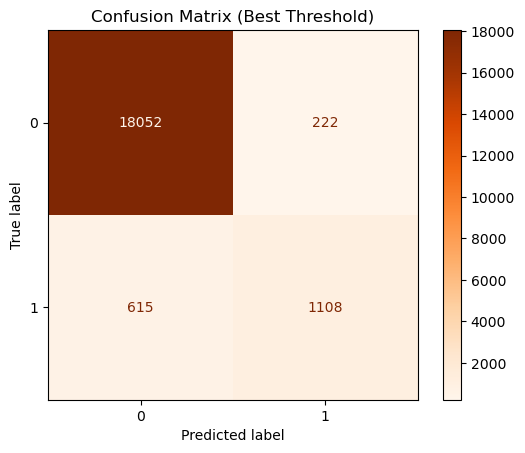

AUC-ROC Score: 0.9615113836574626


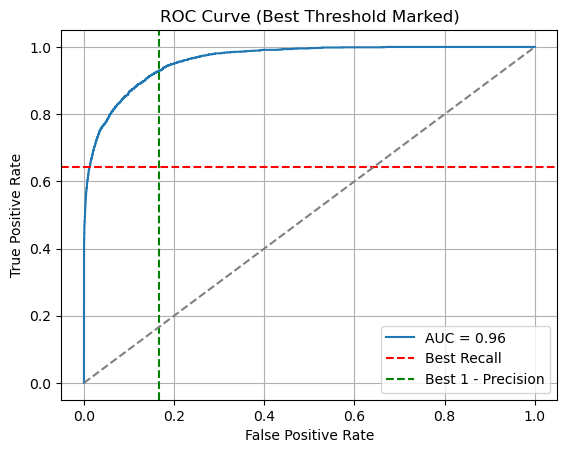

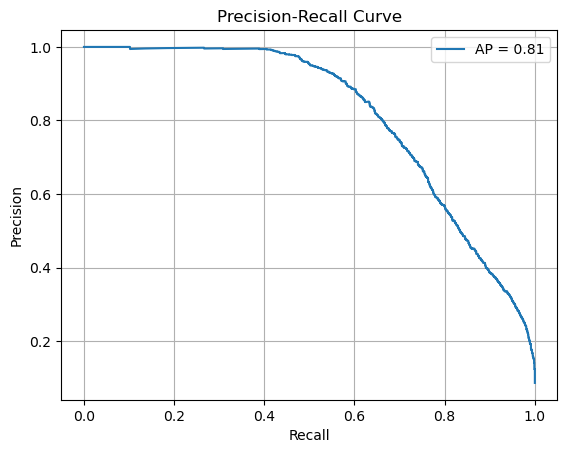


Performance Metrics Summary:
                        Value
Accuracy             0.958144
AUC-ROC              0.961511
Log Loss             0.251026
Brier Score          0.079018
Cohen's Kappa        0.703592
Matthews Corr. Coef  0.710506
RMSE                 0.281101
MSE                  0.079018
                 Feature  Coefficient  Odds Ratio
11           hbA1c_level     1.735984    5.674510
8           hypertension     0.494251    1.639270
9          heart_disease     0.409512    1.506082
1                 gender    -0.215318    0.806285
10                   bmi     0.094049    1.098613
7             race:Other    -0.090897    0.913112
3   race:AfricanAmerican     0.075581    1.078511
2                    age     0.049445    1.050688
12   blood_glucose_level     0.030079    1.030536
0                   year    -0.010278    0.989774
5         race:Caucasian     0.009651    1.009697
4             race:Asian     0.005640    1.005656
6          race:Hispanic    -0.000101    0.999899


In [ ]:
#(max_iter=2000, C=0.01, class_weight='balanced') and using undersampling on train data and best threshold calculated
#importing libraries
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#load
df = pd.read_csv("diabetes_dataset_with_notes.csv") 
#map gender
df["gender"] = df["gender"].map({"Female": 1, "Male": 0})
#drop null values
df = df.dropna()
#convert gender to int
df["gender"] = df["gender"].astype(int)

# define features and target
X = df[["year", "gender", "age", 'race:AfricanAmerican', 'race:Asian',
        'race:Caucasian', 'race:Hispanic', 'race:Other',
        "hypertension", "heart_disease", "bmi", "hbA1c_level", "blood_glucose_level"]]
y = df["diabetes"]

# split before balancing (to keep test set representative)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=500
)

# balance the training data
train_df = X_train.copy()
train_df["diabetes"] = y_train

df_zero = train_df[train_df["diabetes"] == 0].sample(9000, random_state=42)
df_one = train_df[train_df["diabetes"] == 1]
df_train_bal = pd.concat([df_zero, df_one], ignore_index=True).sample(frac=1, random_state=42)

X_train_bal = df_train_bal.drop("diabetes", axis=1)
y_train_bal = df_train_bal["diabetes"]

# train
model = LogisticRegression(max_iter=2000, C=0.01, class_weight='balanced')
model.fit(X_train_bal, y_train_bal)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

# Get predicted probabilities for ROC
y_prob = model.predict_proba(X_test)[:, 1]

# AUC-ROC Score
auc = roc_auc_score(y_test, y_prob)
print("AUC-ROC Score:", auc)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

from sklearn.metrics import precision_recall_curve, classification_report

# get predicted probabilities
probs = model.predict_proba(X_test)[:, 1]

# precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# F1 scores for each threshold
f1_scores = np.nan_to_num((2 * precision * recall) / (precision + recall))

# get threshold that gives highest F1 score
best_threshold = thresholds[f1_scores[:-1].argmax()]

print(f"Best Threshold (Max F1): {best_threshold:.4f}")

# predict using best threshold
y_pred_best = (probs >= best_threshold).astype(int)

# eval
accuracy = accuracy_score(y_test, y_pred_best)


print("Classification Report with Best Threshold:")
print(classification_report(y_test, y_pred_best))

print(f'Accuracy: {accuracy:.4f}')

# cnfusion Matrix using best threshold
cm_best = confusion_matrix(y_test, y_pred_best)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=model.classes_)
disp_best.plot(cmap='Oranges')
plt.title("Confusion Matrix (Best Threshold)")
plt.show()

#ROC CURVE
fpr_best, tpr_best, _ = roc_curve(y_test, y_prob)
# AUC-ROC Score
auc = roc_auc_score(y_test, y_prob)
print("AUC-ROC Score:", auc)
plt.plot(fpr_best, tpr_best, label=f'AUC = {roc_auc_score(y_test, y_prob):.2f}')
plt.axhline(y=recall[f1_scores.argmax()], color='r', linestyle='--', label='Best Recall')
plt.axvline(x=1 - precision[f1_scores.argmax()], color='g', linestyle='--', label='Best 1 - Precision')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Best Threshold Marked)")
plt.legend()
plt.grid()
plt.show()

from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)

plt.plot(recall, precision, label=f'AP = {avg_precision:.2f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()


from sklearn.metrics import f1_score, log_loss, brier_score_loss, cohen_kappa_score, matthews_corrcoef
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error

metrics_summary = {
    "Accuracy": accuracy_score(y_test, y_pred_best),
    "AUC-ROC": roc_auc_score(y_test, y_prob),
    "Log Loss": log_loss(y_test, y_prob),
    "Brier Score": brier_score_loss(y_test, y_prob),
    "Cohen's Kappa": cohen_kappa_score(y_test, y_pred_best),
    "Matthews Corr. Coef": matthews_corrcoef(y_test, y_pred_best),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_prob)),
    "MSE": mean_squared_error(y_test, y_prob)
}

summary_df = pd.DataFrame(metrics_summary, index=["Value"]).T
print("\nPerformance Metrics Summary:")
print(summary_df)

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0],
    'Odds Ratio': np.exp(model.coef_[0])
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df)